## 10.3  聚类

聚类是指一组非常广泛的技术，用于在数据集中查找子组或聚类集群。当我们对一个数据集的观察结果进行聚类时，我们试图将它们划分为不同的组，以便每组内的观察结果彼此非常相似，而不同组内的观察结果彼此非常不同。

由于聚类在许多领域都很流行，因此存在着大量的聚类方法。在本节中，我们关注两种最著名的聚类方法: **K均值聚类** 和 **层次聚类**

### 10.3.1 K均值聚类
K均值聚类是一种简单而优雅的方法，用于将数据集划分为不同的、不重叠的 $K$ 个区域。要执行K均值聚类，我们必须首先指定所需的类的数量 $K$ ;然后K均值算法将每个观测值精确分配到一个 $K$ 类中。
![title](fig6.png)

In [9]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import mglearn
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram,ward,average,complete

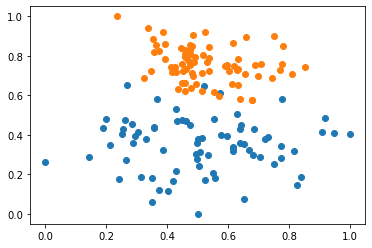

In [4]:
#获取数据
X,y=make_blobs(n_samples=150,
               n_features=2,
               centers=2,
               cluster_std=[1.25,0.75],
               random_state=4
               )
#原始数据
X=MinMaxScaler().fit_transform(X)
fig,ax= plt.subplots(1,1,)
for i in range(2):
    x=X[y==i]
    ax.scatter(x[:,0],x[:,1])
plt.show()

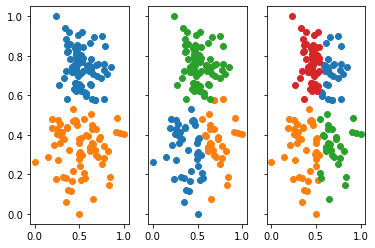

In [5]:
fig,ax=plt.subplots(nrows=1,ncols=3,sharey=True,)
for i in range(3):
    kmeans=KMeans(n_clusters=2+i).fit(X)
    y_kmeans=kmeans.predict(X)
    for j in range(len(set(y_kmeans))):
        x=X[y_kmeans==j]
        ax[i].scatter(x[:,0],x[:,1])

K-means聚类背后的思想是，一个好的聚类是聚类内变异尽可能小。集群$C_k$的集群内差异是一个集群内各观察值之间差异的度量$W(C_k)$。因此我们想要解决的问题是:
$$
minimize{\sum_{k=1}^{K}W(C_k)}\tag{10.9}
$$
这个公式表示，我们想要将观察结果划分为$K$个类，以便类中变异之和尽可能小。
解决(10.9)似乎是一个合理的想法，但为了使其可行，我们需要定义类中的变化。有许多可能的方法来定义这个概念，但到目前为止，最常见的选择涉及平方的欧氏距离。也就是说，我们定义:
$$
W(C_k)=\frac{1}{\left | C_k \right | } \sum_{i,i'\in C_k}\sum_{j=1}^{p} (x_{ij}-x_{i'j})^2\tag{10.10}
$$
其中$|Ck|$表示第k个簇中的观测数。换句话说，第k个类的类中变异是$k^{th}$类中观测值之间的所有成对平方欧氏距离的总和，除以$k^{th}$类中观测值的总数。结合(10.9)和(10.10)得到定义K均值聚类的优化问题:
$$
minimize\left \{  \frac{1}{\left | C_k \right | } \sum_{i,i'\in C_k}\sum_{j=1}^{p} (x_{ij}-x_{i'j})^2\right \}\tag{10.11}
$$
现在，我们想找到一个算法来求解(10.11)
![title](fig7.png)
![title](fig8.png)

### 10.3.2 层次聚类
层次聚类是一种不需要设定 $K$ 值的聚类方法。与K均值聚类相比，层次聚类的一个特别的优点是它可以形成一个树状图。在本节中，我们将描述一个自下而上的聚类。这种自下而上的聚类方式十分常见，它指的是：树状图从树叶开始，然后聚类到树干。
#### 1.解释树状图
我们从图中所示的模拟数据集开始，它由二维空间中的45个观测数据组成。
![title](fig9.png)

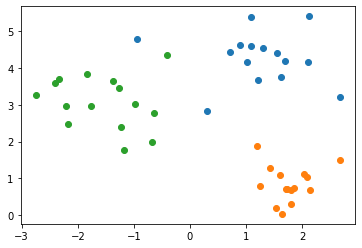

In [6]:
#获取数据
X,y=make_blobs(n_samples=45,
               n_features=2,
               centers=3,
               cluster_std=[0.75,0.5,0.75],
               random_state=0
               )
#原始数据
fig,ax= plt.subplots(1,1,)
for i in range(3):
    x=X[y==i]
    ax.scatter(x[:,0],x[:,1])
plt.show()

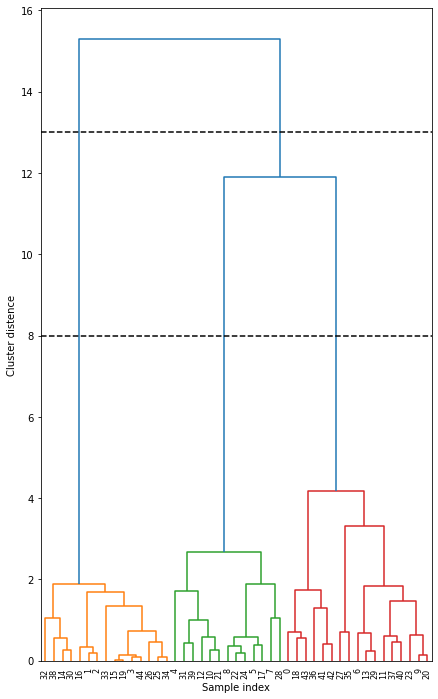

In [7]:
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(7,12))
linkage_array=ward(X)
dendrogram(linkage_array,ax=ax)
bounds=ax.get_xbound()
ax.plot(bounds,[13.0,13.0],'--',c='k')
ax.plot(bounds,[8.0,8.0],'--',c='k')
plt.xlabel("Sample index")
plt.ylabel("Cluster distence")
plt.show()

现在我们理解了如何解释上面图的左边面板，我们可以继续讨论基于树状图确定集群的问题。为了做到这一点，我们在树形图上做一个水平切割，如下图的中间和右边面板所示。

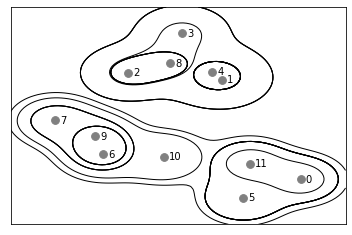

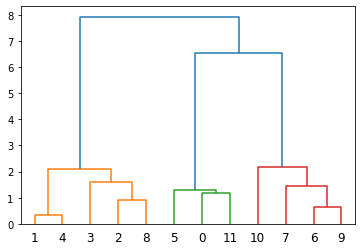

In [10]:
mglearn.plots.plot_agglomerative()
plt.show()
X1,y1=make_blobs(random_state=0,n_samples=12)
linkage_array=ward(X1)
dendrogram(linkage_array)
plt.show()

在上图的情况下，可以选择选择两个或三个类。然而，截断树状图的位置的选择往往不是那么明确。术语层次指的是，通过在给定高度上切割树状图而获得的类必然嵌套在通过在任何更高高度上切割树状图而获得的类中。
然而，在任意数据集上，这种分层结构的假设可能是不现实的。例如，假设我们的观察结果与一组男女各占一半的人相对应，美国人、日本人和法国人各占一半。我们可以想象这样一个场景，最好分成两组的人可能会按性别来划分，最好分成三组的人可能会按国籍来划分。在这种情况下，真正的类并没有嵌套，也就是说，将最佳划分为三个组并不是将最佳划分为两个组并分割其中一个组的结果。
由于这种情况，对于给定数量的集群，层次聚类有时会产生比K均值聚类更差的结果(即准确度更低)。

#### 2.层次聚类算法
我们首先定义每对观察结果之间的某种不同度量。大多数情况下，我们使用欧氏距离。
![title](fig10.png)

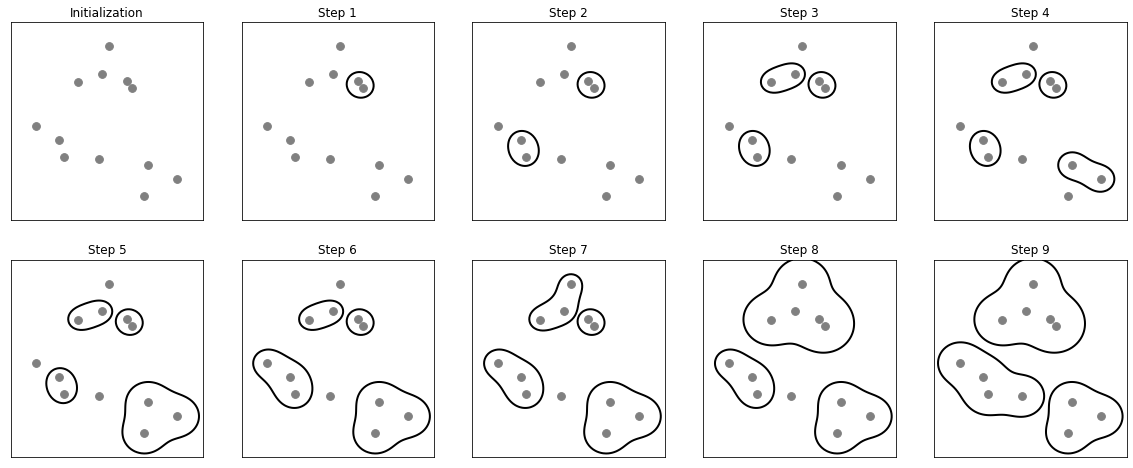

In [11]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

这个算法似乎很简单，但有一个问题还没有解决。我们有一个观察对之间的不同的概念，但如果一个或两个群集包含多个观察，我们如何定义两个类之间的不同?
##### 1.最短距离法(SINgle linkage)
当某步骤类 $G_{p}$ 和 $G_{q}$ 合并为 $G_{r}$ 后，新的类 $G_{r}$ 与其他类 $G_{k}$的类间距离为：
$$
D_{rk}=\min(D_{pk},D_{qk})
$$
##### 2.最长距离法(COMplete linkage)
当某步骤类 $G_{p}$ 和 $G_{q}$ 合并为 $G_{r}$ 后，新的类 $G_{r}$ 与其他类 $G_{k}$的类间距离为：
$$
D_{rk}=\max(D_{pk},D_{qk})
$$
##### 3.中间距离法 (MEDian method)
如果类与类之间的距离既不采用两类之间的最近距离，也不采用最远的距离，而是才哟个介于这两者之间的距离，这种方法就称为中间距离法。
当某步骤类 $G_{p}$ 和 $G_{q}$ 合并为 $G_{r}$ 后，新的类 $G_{r}$ 与其他类 $G_{k}$的类间距离为：
$$
D_{rk}^{2}=\frac{1}{2}(D_{pk}+D_{qk})^{2}+\beta D_{pq}^{2}
$$
其中，$-1/4<=\beta <=0$ ，常取 $\beta=1/4$
##### 4.重心法 (CENtroid method)
以上三种方法定义类与类之间的距离时，没有考虑每一类中包含的样品个数，如果将两类间的距离定义为两类重心间的距离，这种聚类方法被称为重心法。如果样品间距离取欧氏距离，则：
$$
D_{rk}^{2}=\frac{n_p}{n_r}D_{pk}^2+\frac{n_q}{n_r}D_{qk}^2+\frac{n_p}{n_r}\frac{n_q}{n_r}D_{pq}^2
$$
##### 5.类平均法(AVErage linkage)
重心法虽有较好的代表性，但并未充分利用各个样品的信息，因而又有人提出用两类样品两两之间的平方距离的平均作为类之间的距离，即：
$$
D_{pq}^2=\frac{1}{{n_p}{n_q}}\sum_{i\in G_{p},j\in {G_q}}d_{ij}^{2}
$$
##### 6.离差平方和法(WARD)
WARD法的基本思想是，先将n个样品各自成一类，此时 $W=0$ ；然后每次将其中某两类合并为一类，因每缩小一类离差平方和就要增加，每次选择使W增加最小的两类进行合并，直至所有样品合并为一类为止。WARD法把某两类合并后增加的离差平方和看成为类间的平方距离，即：
$$
D_{pq}^{2}=W_{r}-(W_{p}+W{q})
$$


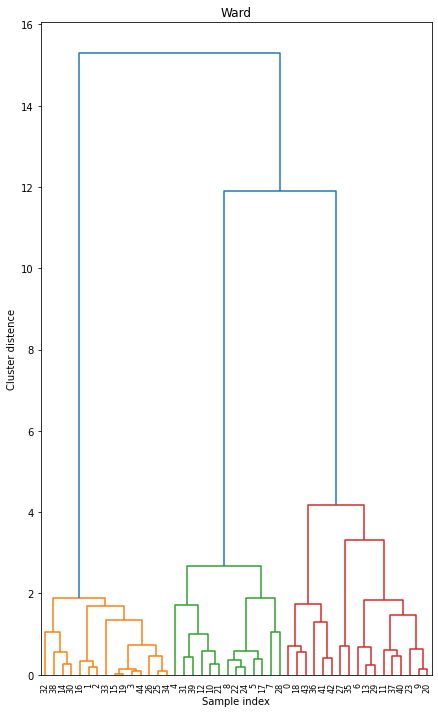

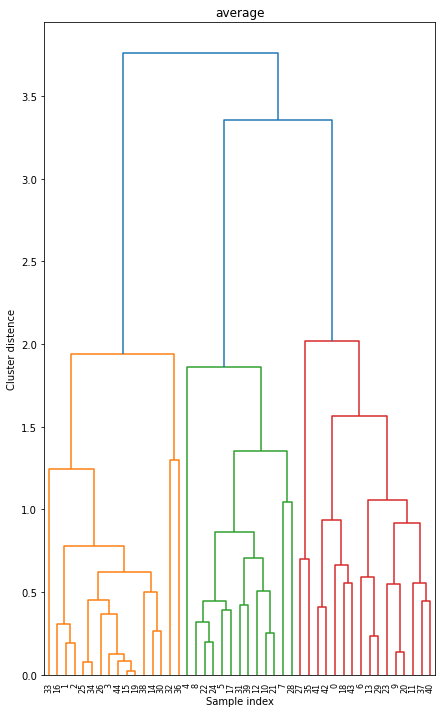

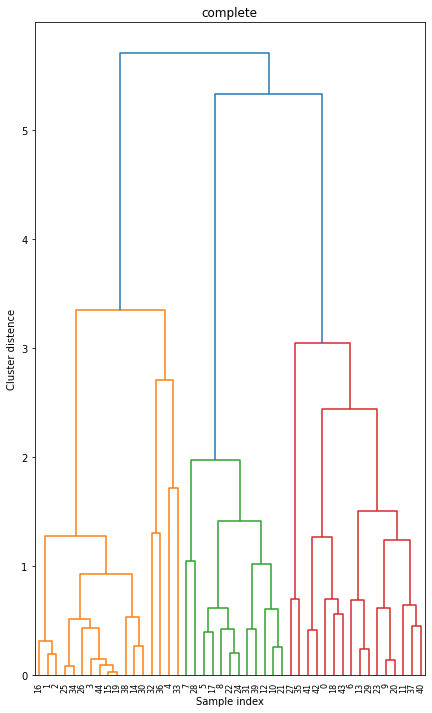

In [12]:
func=[ward,average,complete]
title=['Ward','average','complete']
for i in range(3):
    fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(7,12))
    linkage_array=func[i](X)
    dendrogram(linkage_array,ax=ax)
    plt.xlabel("Sample index")
    plt.ylabel("Cluster distence")
    plt.title(title[i])
    plt.show()

#### 3.不同度量的选择
到目前为止，本章的例子都是使用欧几里得距离作为不同度量。但有时可能会采用其他不同的方法。例如，基于相关性的距离认为，如果两个观测结果的特征高度相关，那么它们是相似的，即使根据欧几里得距离来看，观测值可能相差很远。
![title](fig12.png)
不同度量的选择是非常重要的，因为它对生成的树状图有很强的影响。一般来说，应该仔细注意聚集的数据类型和手头的科学问题。这些考虑因素应该决定在分层聚类中使用哪种类型的不同度量。
例如，假设一个在线零售商对基于购物者过去的购物历史聚集购物者感兴趣。如果使用欧氏距离，那么总体上购买的商品很少的购物者(即不经常使用在线购物网站的用户)将聚集在一起。这可能不是我们想要的。另一方面，如果使用基于相关性的距离，那么具有相似偏好的购物者(例如，购买了A和B商品，但从未购买C或D商品的购物者)将聚集在一起，即使一些具有这些偏好的购物者比其他购物者的购买量更高。因此，对于这种应用，基于相关性的距离可能是一个更好的选择。
除了仔细选择使用的不同度量外，还必须考虑在计算观测值之间的不同之前，是否应该将变量缩放到有标准偏差1。
为了说明这一点，我们继续刚才描述的在线购物示例。有些道具的购买频率可能高于其他道具;例如，一个购物者可能一年买十双袜子，但很少买电脑。
![title](fig13.png)
*左图:显示的是8位网购者购买的袜子和电脑的数量。
*中心:将每个变量按标准差缩放后，显示相同的数据。
*右:同样的数据显示，但现在y轴代表每个网上购物者花在袜子和电脑上的钱的数量。

不同的距离
描述样品间亲疏程度最常用的就是距离，常用的距离有：
##### 1.闵可夫斯基(Minkowski)距离
$$
d_{ij}=[\sum_{t=1}^{m}|x_{it}-x_{jt}|^{q}]^{1/q}  
$$
(1)绝对值距离：当 $q=1$ 时一阶闵可夫斯基距离为：
$$
d_{ij}(1)=\sum_{t=1}^{m}|x_{it}-x_{jt}|  
$$
我们称其为绝对值距离<br>
(2)欧氏距离：当 $q=2$ 时二阶闵可夫斯基距离为：
$$
d_{ij}(2)=\sqrt{\sum_{t=1}^{m}|x_{it}-x_{jt}|^{2}}
$$
称其为欧氏距离
欧氏距离是聚类分析种使用最广泛的距离。但该距离和各变量的量纲有关；没有考虑指标间的相关性；也没有考虑各变量方差的不同。
(3)切比雪夫距离：当 $q$ 趋于 $\infty$ 时，称：
$$
d_{ij}(\infty)=\max_{1<=t<=m}|x_{it}-x_{jt}|
$$
##### 2.兰氏(Lance)距离
兰氏距离是聚类分析中用于确定样本间距离的一种常见方法，由Lance和Williams最早提出的，故称为兰氏距离。其定义为：
$$
d_{ij}(L)=\frac{1}{m}\sum_{t=1}^{m}\frac{|x_{it}-x_{jt}|}{x_{it}+x_{jt}}
$$
兰氏距离是一个无量纲的量，克服了闵可夫斯基距离与各指标的量纲有关的缺点，且兰氏距离对大的奇异值不敏感，这使其特别适合高度偏移的和数据。但兰氏距离也没有考虑变量间的相关性。闵可夫斯基距离和兰氏距离都是假定变量之间相互独立，即在正交空间中讨论距离。但在实际问题中，变量之间往往存在着一定的相关性，为克服变量之间相关性的影响，可以采用马氏距离。
##### 3.马氏距离
马氏距离的定义为：
$$
d_{ij}(M)=(X_{i}-X_{j})'S^{-1}(X_{i}-X_{j})
$$
其中，$S^{-1}$ 为样本协方差阵的逆矩阵。
马氏距离虽然可以排除变量之间的相关性干扰，并且不受量纲的影响。但是在聚类分析处理之前，如果用全部数据计算均值和协方差阵来求马氏距离，效果不是很好。比较合理的方法是用各个类的样本计算各自的协方差矩阵，同一类样品间的马氏距离应当用这一类的协方差阵计算，但类的形成需要依赖于样本间的距离，而样品间合理的马氏距离又依赖于类，这就形成了一个恶行循环。因此在实际聚类分析中，马氏距离也不是理想的距离。
##### 4.斜交空间距离
由于变量之间存在不同程度的相关关系，在这种情况下，用正交空间距离来计算样品间的距离，易发生形变，从而使得用聚类分析进行分类时的谱系结构发生变形。
在m维空间中，为使具有相关性变量的谱系结构不发生变形，采用由下式定义的斜交空间距离：
$$
d_{ij}=[\frac{1}{m^2}\sum_{k=1}^{m}\sum_{k=1}^{l}(x_{ik}+x_{jk})(x_{il}+x_{jl})r_{kl}]^{1/2}
$$
在数据标准化处理下，式中的 $r_{kl}$ 即为变量 $S_{k}$ 和 $X_{L}$之间的相关系数。


### 10.3.3聚类中的实际问题
* 观察结果或特征是否应该首先以某种方式标准化呢?例如，变量应该居中，使其均值为0，并缩放为标准差为1。
* 在层次聚类的情况下，应该使用什么不同度量呢?应该使用什么类型的链接?为了获得类，我们应该将树状图切到哪里?
* 在K均值聚类的情况下，我们应该在将数据分为几个类?
K均值和层次聚类都会将每个观察结果分配到一个类中。然而，有时这可能不合适。例如，假设大多数观察结果确实属于少数(不知道的)子组，并且有一小部分观察结果彼此之间有很大的不同，也与所有其他观察结果有很大的不同。
此外，聚类方法通常对数据的扰动不是很稳健。例如，假设我们聚类$n$个样本，然后在随机删除$n$个样本的一个子集后再次聚类。
由于聚类可能是非鲁棒性的，我们推荐对数据的子集进行聚类，以获得所获得的聚类的鲁棒性。最重要的是，我们必须注意如何报告聚类分析的结果。这些结果不应该被认为是关于一个数据集的绝对真理。相反，它们应该成为发展科学假设和进一步研究的起点，最好是独立的数据集。